# Changes in the incidence of cancer in Belarus before and after the Chernobyl disaster

This is my first EDA notebook.

This notebook was made during the blackout in Ukraine


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-darkgrid')


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


        

/kaggle/input/cancer-rate-before-and-after-chernobyl/cancer_before_and_after_Chernobyl_Belarus.csv


First, let's look at the data.

In [2]:
df_cancer = pd.read_csv('/kaggle/input/cancer-rate-before-and-after-chernobyl/cancer_before_and_after_Chernobyl_Belarus.csv')
df_cancer.head(10)

,year,sex,location,cancer_type,cases
0,1985,women,Gomel,skin,17.3
1,1985,women,Mogilev,skin,16.8
2,1986,women,Gomel,skin,15.6
3,1986,women,Mogilev,skin,18.3
4,1985,women,Belarus,skin,14.9
5,1986,women,Belarus,skin,16.5
6,1985,men,Gomel,skin,19.9
7,1985,men,Mogilev,skin,20.5
8,1986,men,Gomel,skin,20.1
9,1986,men,Mogilev,skin,22.4


In [3]:
df_cancer.shape


(84, 5)

In [4]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         84 non-null     int64  
 1   sex          84 non-null     object 
 2   location     84 non-null     object 
 3   cancer_type  84 non-null     object 
 4   cases        84 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 3.4+ KB


In [5]:
df_cancer['year'] = np.where((df_cancer.year == 1985), '1977-1985', '1986-1994')

In [6]:
df_cancer.groupby(['year', 'sex']).agg({'sex': 'count'})

sex
year      sex       
1977-1985 men     21
          women   21
1986-1994 men     21
          women   21

In [7]:
df_cancer.groupby(['year', 'location']).agg({'location': 'count'})

location
year      location          
1977-1985 Belarus         14
          Gomel           14
          Mogilev         14
1986-1994 Belarus         14
          Gomel           14
          Mogilev         14

In [8]:
df_cancer.groupby(['year', 'cancer_type']).agg({'cancer_type': 'count'})

cancer_type
year      cancer_type             
1977-1985 colon                  6
          kidney                 6
          lungs                  6
          pancreas               6
          rectum                 6
          skin                   6
          thyroid                6
1986-1994 colon                  6
          kidney                 6
          lungs                  6
          pancreas               6
          rectum                 6
          skin                   6
          thyroid                6

Let's look at the change in cases of morbidity before and after the Chernobyl accident.

The cases are provided per 100.000 people.

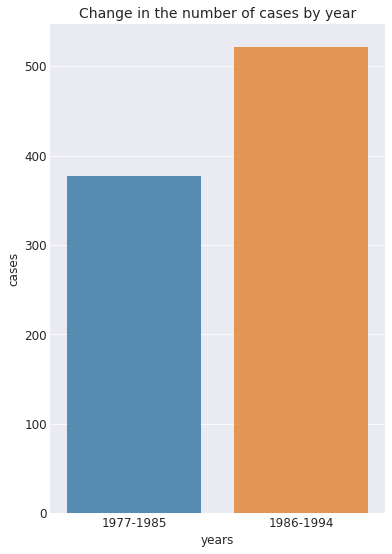

In [9]:
plt.figure(figsize=(6, 9))
sns.barplot(data=df_cancer, x='year', y='cases', alpha=.8, estimator=np.sum, ci=None)
plt.title('Change in the number of cases by year', fontsize=14)
plt.ylabel('cases', fontsize=12)
plt.xlabel('years', fontsize=12)
plt.tick_params(labelsize=12)

In [10]:
before, after = df_cancer.\
    groupby('year')['cases']\
    .sum()\
    .reset_index()\
    .sort_values('year', ascending=True)['cases']

print(f'The percentage increase in the number of cases is: {round((after - before) / before * 100, 2)}%')

The percentage increase in the number of cases is: 38.27%


We are seeing a significant increase in the incidence.

Сheck the change depending on gender and years.

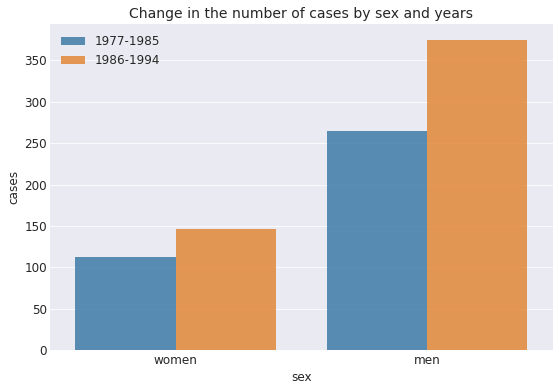

In [11]:
plt.figure(figsize=(9, 6))
sns.barplot(data=df_cancer, x='sex', y='cases', alpha=.8, estimator=np.sum, hue='year', ci=None)
plt.title('Change in the number of cases by sex and years', fontsize=14)
plt.ylabel('cases', fontsize=12)
plt.xlabel('sex', fontsize=12)
plt.legend(fontsize='large')
plt.tick_params(labelsize=12)

In [12]:
before_men, after_men =df_cancer[df_cancer['sex'] == 'men']\
    .groupby('year')['cases']\
    .sum()\
    .reset_index()\
    .sort_values('year',axis=0, ascending=True)['cases']
print(f'The percentage increase in the number of diseases in men is: {round((after_men - before_men) / before_men * 100, 2)}%')

before_women, after_women =df_cancer[df_cancer['sex'] == 'women']\
    .groupby('year')['cases']\
    .sum()\
    .reset_index()\
    .sort_values('year',axis=0, ascending=True)['cases']
print(f'The percentage increase in the number of diseases in women is: {round((after_women - before_women) / before_women * 100, 2)}%')

The percentage increase in the number of diseases in men is: 41.92%
The percentage increase in the number of diseases in women is: 29.72%


Men are more prone to getting cancer than women.

Based on the data, the percentage increase in the number of cases in men is greater than in women.

Change in the number of cases depending on the type of cancer.

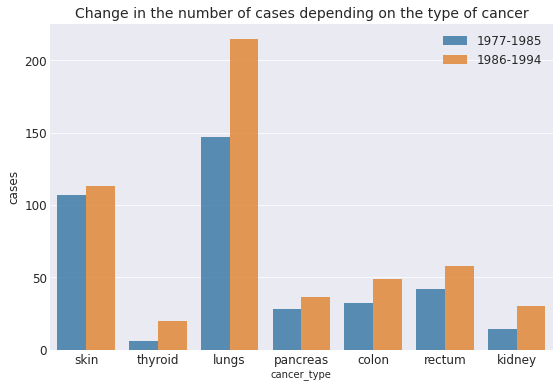

In [13]:
fig = plt.figure(figsize=(9, 6))
sns.barplot(data=df_cancer, x="cancer_type", y="cases", hue="year", alpha=.8, estimator=np.sum, ci=None, )
plt.title('Change in the number of cases depending on the type of cancer', fontsize=14)
plt.ylabel('cases', fontsize=12)
plt.legend(fontsize='large')
plt.tick_params(labelsize=12)

In [14]:
cancer_type = df_cancer['cancer_type'].unique()
cancer_changes = []
for type in df_cancer['cancer_type'].unique():
    before, after =df_cancer[df_cancer['cancer_type'] == type]\
        .groupby('year')['cases']\
        .sum()\
        .reset_index()\
        .sort_values(by='year')['cases']
    cancer_changes.append(round((after - before) / before * 100, 2))
changes_by_type = pd.DataFrame(list(zip(cancer_type, cancer_changes)), columns=['cancer_type', 'changes']).sort_values(by='changes',axis=0,ascending=False)
changes_by_type

,cancer_type,changes
1,thyroid,209.38
6,kidney,109.66
4,colon,50.31
2,lungs,46.15
5,rectum,37.68
3,pancreas,30.00
0,skin,6.19


Text(0.5, 0, '')

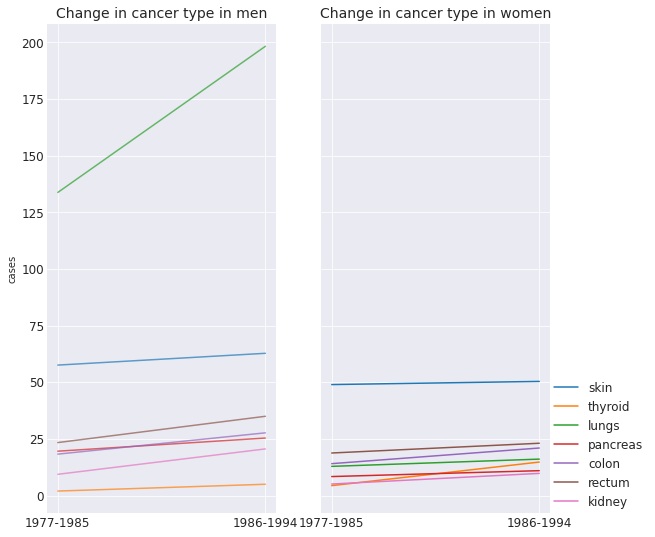

In [15]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(9, 9))
sns.lineplot(
    data=df_cancer[df_cancer['sex'] == 'men'],
    x="year", y="cases", hue='cancer_type',
    estimator=np.sum, alpha=.7, ci=None, legend=False, ax=ax[0])
ax[0].set_title('Сhange in cancer type in men', fontsize=14)
ax[0].tick_params(labelsize=12)
ax[0].set_xlabel(None)
sns.lineplot(
    data=df_cancer[df_cancer['sex'] == 'women'],
    x="year", y="cases", hue='cancer_type',
    estimator=np.sum, ci=None, ax=ax[1])
ax[1].set_title('Сhange in cancer type in women', fontsize=14)
ax[1].legend(loc=(1, 0), fontsize='large')
ax[1].tick_params(labelsize=12)
ax[1].set_xlabel(None)

In [16]:
cancer_changes_men = []
cancer_changes_women = []
for type in df_cancer['cancer_type'].unique():
    before, after =df_cancer[(df_cancer['cancer_type'] == type) & (df_cancer['sex']=='men')]\
        .groupby('year')['cases']\
        .sum()\
        .reset_index()\
        .sort_values(by='year')['cases']
    cancer_changes_men.append(round((after - before) / before * 100, 2))

for type in df_cancer['cancer_type'].unique():
    before, after =df_cancer[(df_cancer['cancer_type'] == type) & (df_cancer['sex']=='women')]\
        .groupby('year')['cases']\
        .sum()\
        .reset_index()\
        .sort_values(by='year')['cases']
    cancer_changes_women.append(round((after - before) / before * 100, 2))

changes_by_type_sex = pd.DataFrame(list(zip(cancer_type,cancer_changes_men, cancer_changes_women)),\
                                   columns=['cancer_type', 'changes_men','changes_women'])\
    .sort_values(by=['changes_men','changes_women'],axis=0,ascending=False)
changes_by_type_sex

,cancer_type,changes_men,changes_women
1,thyroid,150.00,236.36
6,kidney,119.15,92.16
4,colon,51.37,48.94
5,rectum,49.57,22.87
2,lungs,48.21,24.81
3,pancreas,29.59,30.95
0,skin,9.03,2.86


Both sexes have the highest increase in thyroid and kidney cancers.
In the case of thyroid cancer, women have a higher incidence rate than men.
In the case of kidney cancer in men, a higher increase in the incidence.
Men are more likely to get sick with all types of cancer except for thyroid cancer.
Cases of lung cancer in men are especially prominent, I suppose that this is also due to the fact that in those years in Belarus there were much more smokers among men than among women.


Changes by city.



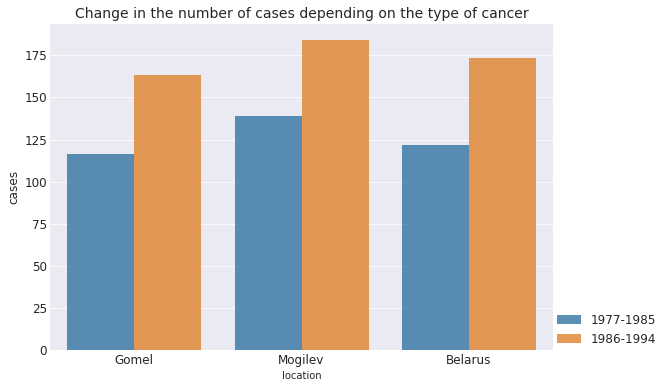

In [17]:
fig = plt.figure(figsize=(9, 6))
sns.barplot(data=df_cancer, x="location", y="cases", hue="year", estimator=np.sum, alpha=.8, ci=None, )
plt.title('Change in the number of cases depending on the type of cancer', fontsize=14)
plt.ylabel('cases', fontsize=12)

plt.legend(loc=(1, 0), fontsize='large')
plt.tick_params(labelsize=12)

Text(0.5, 0, '')

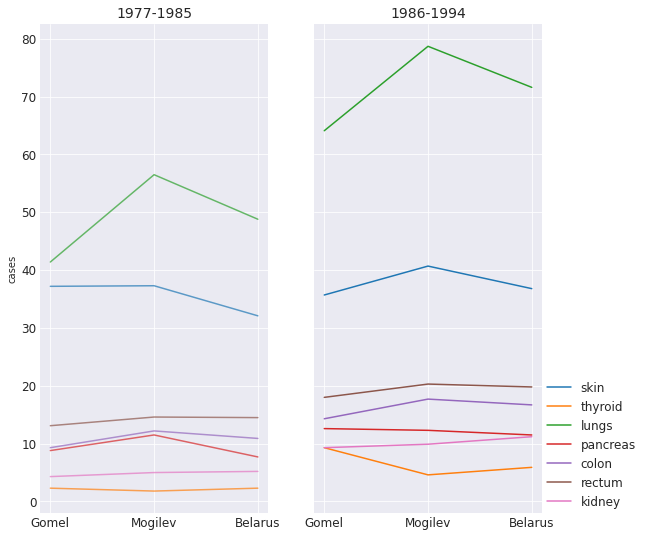

In [18]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(9, 9))
sns.lineplot(
    data=df_cancer[df_cancer['year'] == '1977-1985'],
    x="location", y="cases", hue='cancer_type', estimator=np.sum, alpha=.7, ci=None, legend=False, ax=ax[0])
ax[0].set_title('1977-1985', fontsize=14)
ax[0].tick_params(labelsize=12)
ax[0].set_xlabel(None)
sns.lineplot(
    data=df_cancer[df_cancer['year'] == '1986-1994'],
    x="location", y="cases", hue='cancer_type', estimator=np.sum, ci=None, ax=ax[1])
ax[1].set_title('1986-1994', fontsize=14)
ax[1].legend(loc=(1, 0), fontsize='large')
ax[1].tick_params(labelsize=12)
ax[1].set_xlabel(None)

In [19]:
locations = df_cancer['location'].unique()
cancer_changes = []
for location in df_cancer['location'].unique():
    before, after =df_cancer[df_cancer['location'] == location]\
        .groupby('year')['cases']\
        .sum()\
        .reset_index()\
        .sort_values(by='year')['cases']
    cancer_changes.append(round((after - before) / before * 100, 2))
changes_by_location = pd.DataFrame(list(zip(locations, cancer_changes)), columns=['location', 'changes']).sort_values(by='changes',axis=0,ascending=False)
changes_by_location

,location,changes
2,Belarus,42.80
0,Gomel,40.29
1,Mogilev,32.61


A noticeable increase in the incidence throughout the territory of Belarus.
Gomel is located at a distance of 190 km from the Chernobyl nuclear power plant, Mogilev at a distance of 350 km. In Gomel, after the accident, there is a growth in the incidence, regardless of the type of cancer, relative to other regions, especially such as thyroid, skin and pancreas cancer.

# Conclusion

After the accident at the Chernobyl nuclear power plant, there has been an increase in cases of cancer in Belarus.
In general, men have a higher incidence of cancer, especially lung cancer.
The largest increase in the incidence in such types of cancer as kidney cancer and cancer of the thyroid.
In cities that are closer to Chernobyl, the incidence rate is higher.
These regions have high growths in pancreas, thyroid, and skin cancers.

The horrific consequences of the accident at the Chernobyl nuclear power plant once again tell us that humanity must not allow a repetition of such a scenario.

